#Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans


#Importing the dataset
link=df = "https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv")

#Data analysis

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape
#if we have low amount of data points,
#how can we enlarge the present datapoints to train our model

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


* Conclusions
1. No Null values
2. Gender has the dtype of objet,which needs to be taken care

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* Conclusions
1. Avg. age of customer is 38
2. Customer that visits the mall is having the age b/w 18 to 70
3. Having the Avg. annual income as $60k

<Axes: xlabel='Age', ylabel='count'>

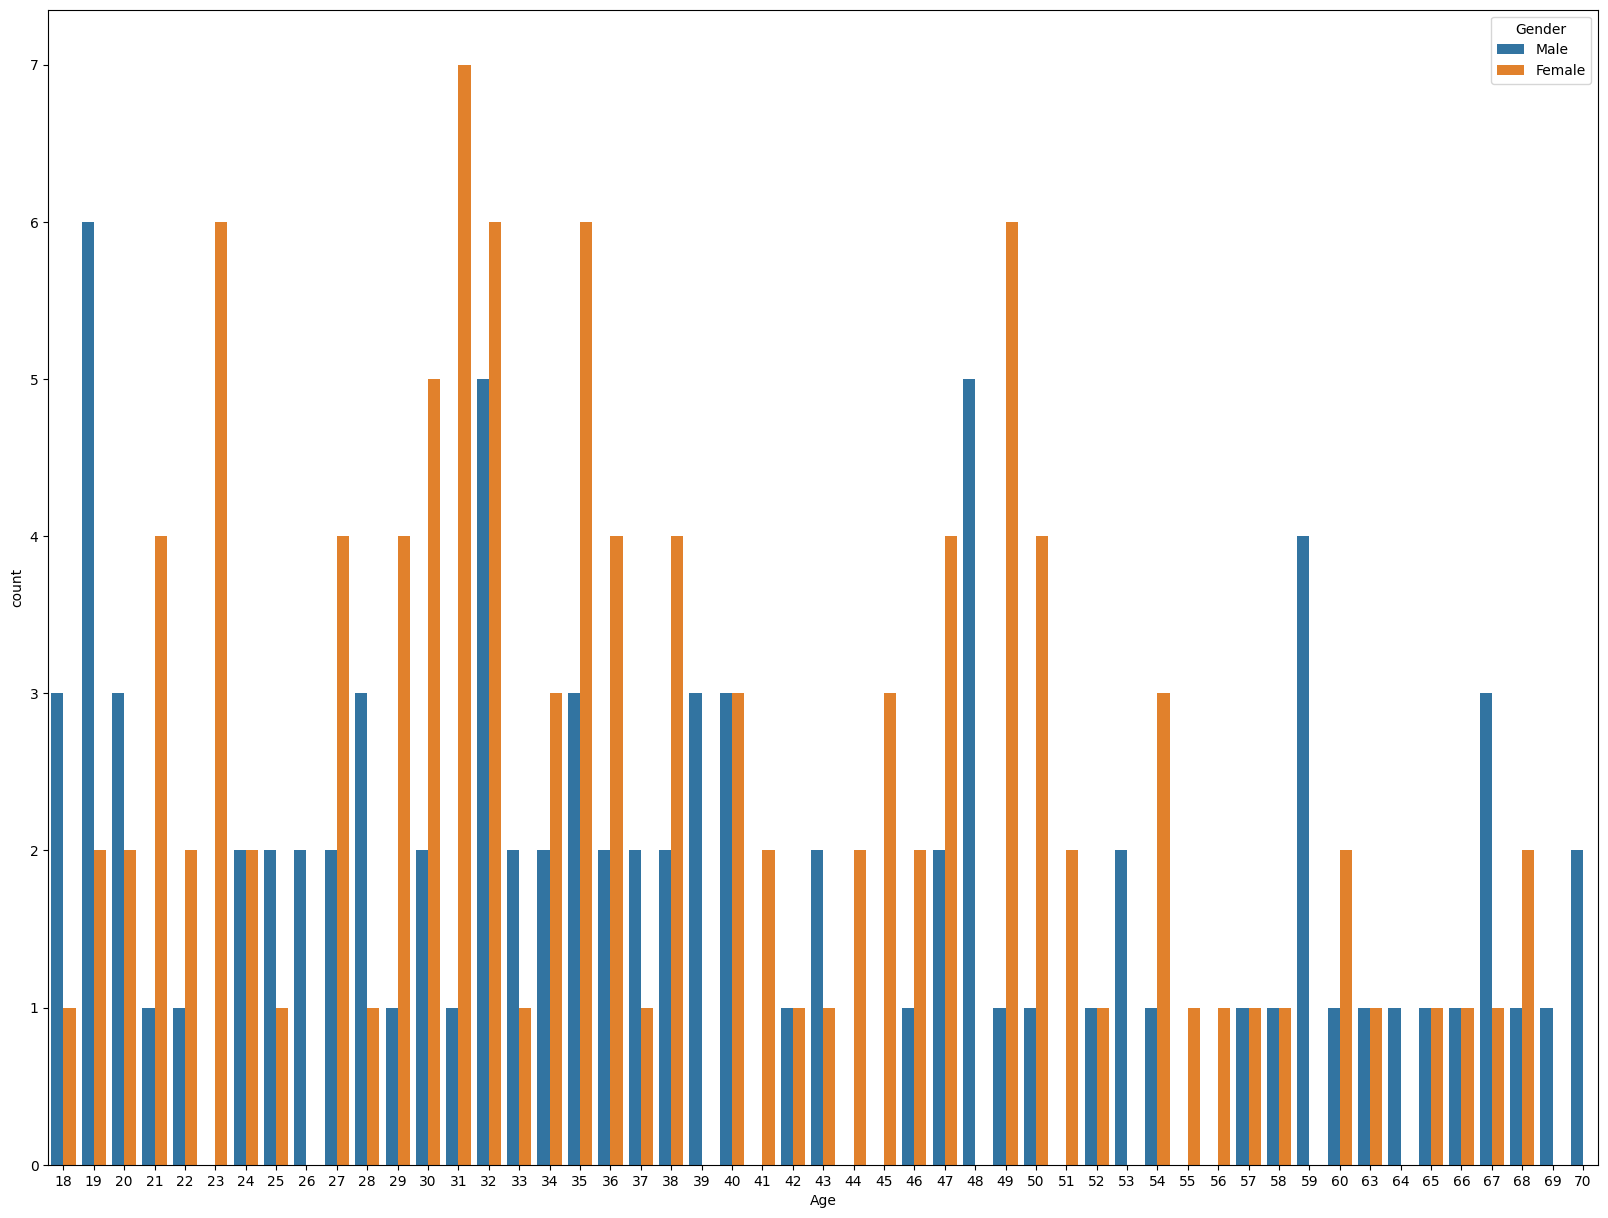

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='Age', hue='Gender')
#

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# show how many % of male & female visits the mall with the help of a plot


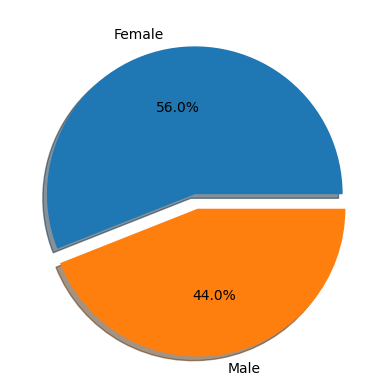

In [ ]:
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%',shadow=True,explode=[0,0.1])
plt.show()

* conclusion
1. No of females>No of males
2. Females are 12% more than Male
3. Female visits the mall most of the time.

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='count'>

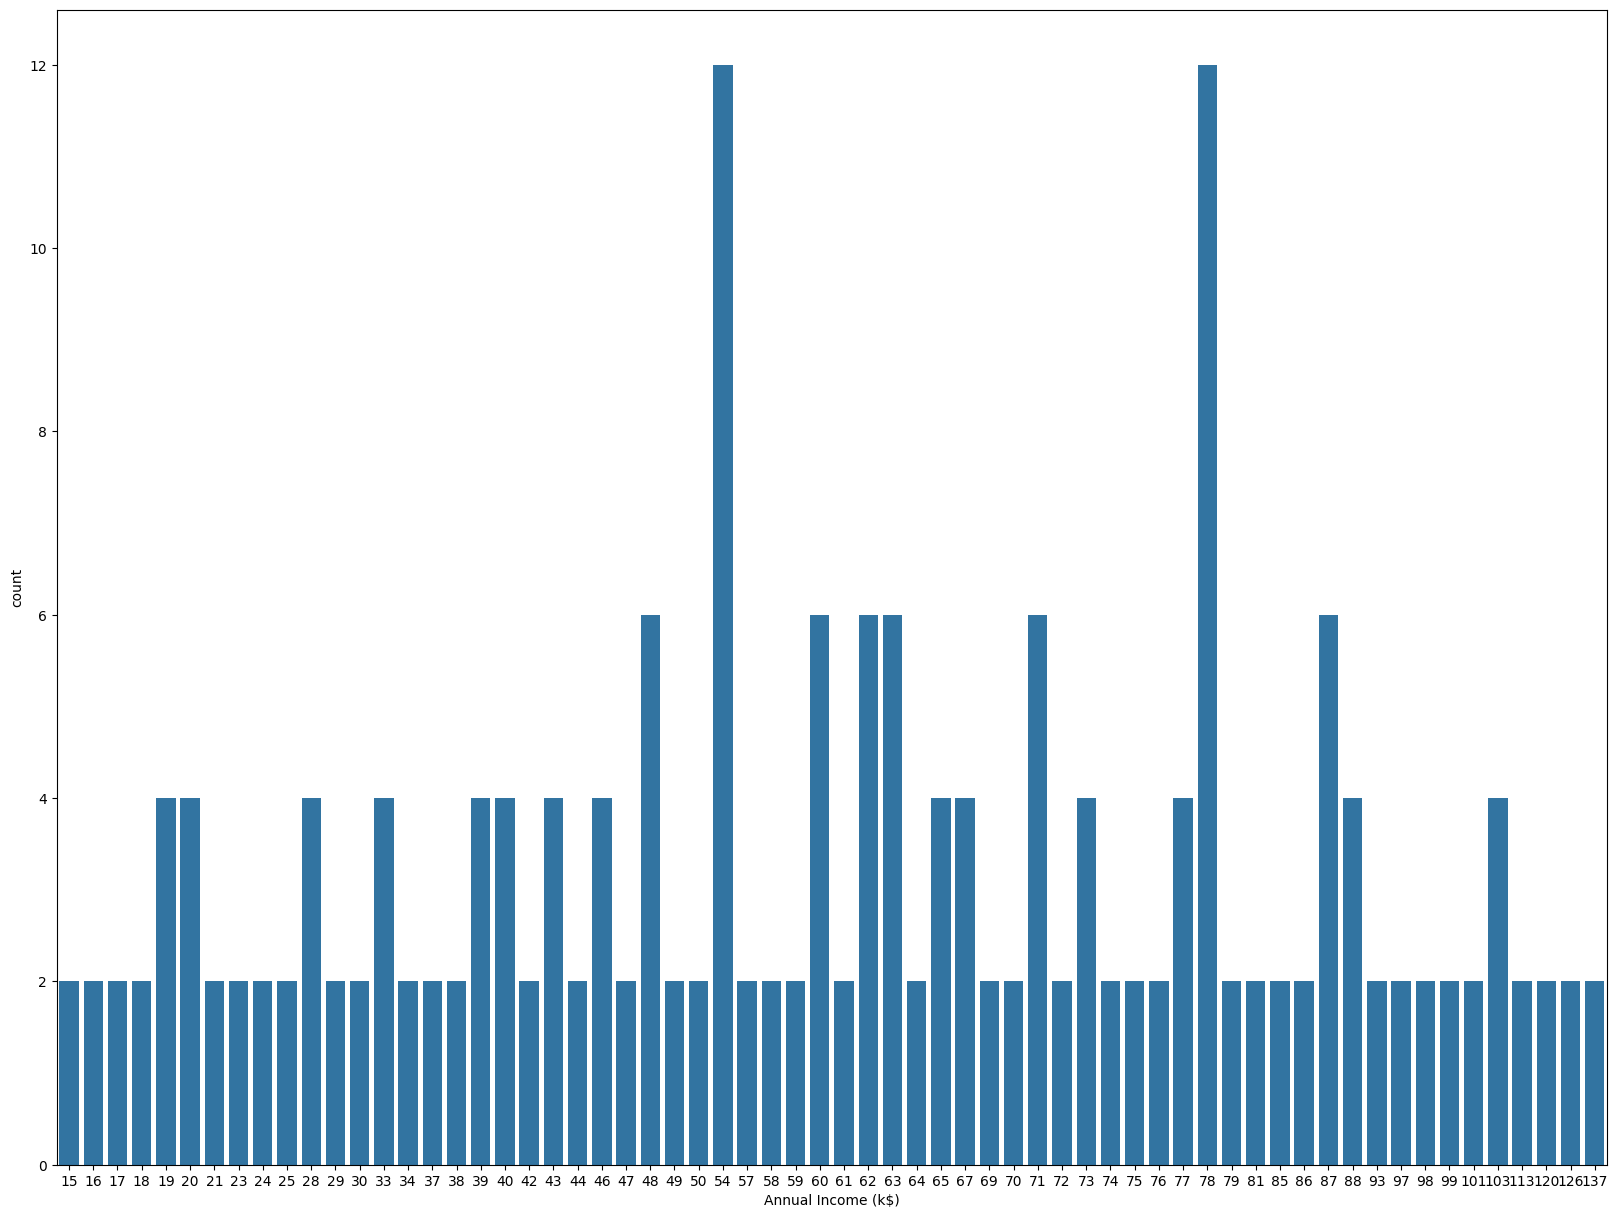

In [ ]:
#Distribution of income
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='Annual Income (k$)')

* Conclusions
1. The customers that are having the salary of 54(k) and 78(k) , visits the mall most of time

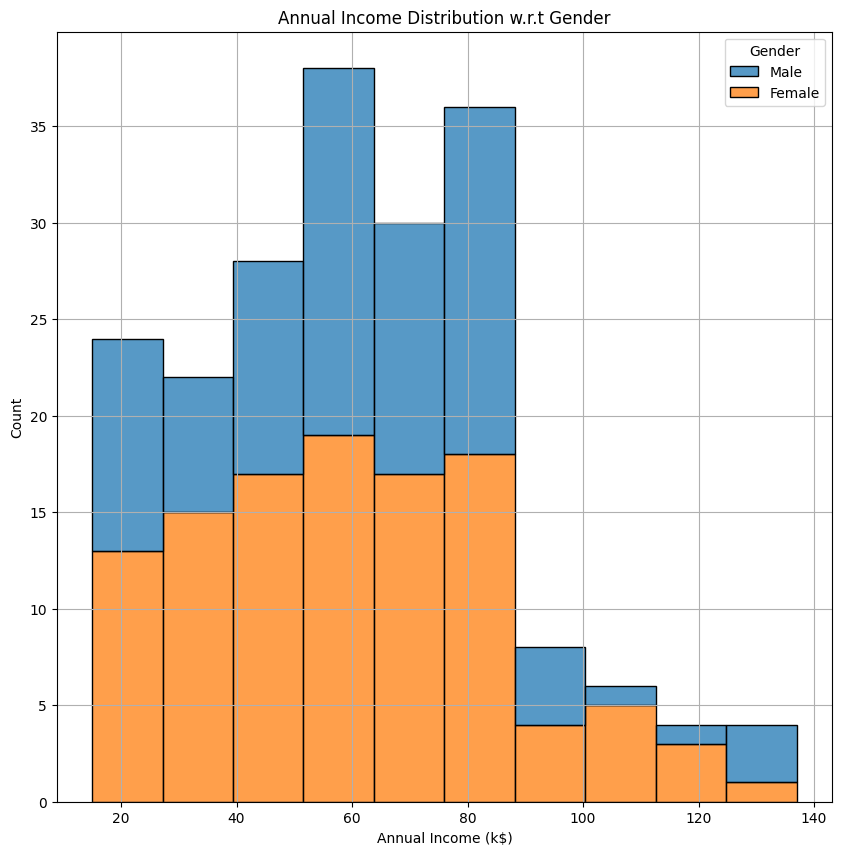

In [ ]:
# Show the annual income distribution w.r.t to the Gender
plt.figure(figsize=(10,10))
sns.histplot(df,x='Annual Income (k$)',hue='Gender',multiple='stack')
plt.title('Annual Income Distribution w.r.t Gender')
plt.grid()


* conclusion
# Seaborn implot

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


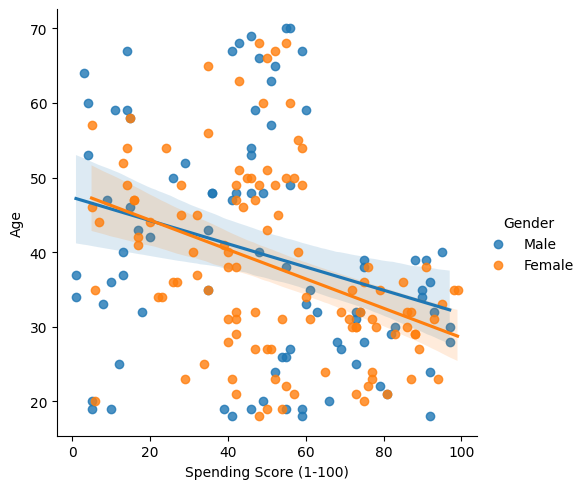

In [ ]:
sns.lmplot(df,x='Spending Score (1-100)',y='Age',hue='Gender')

#Machine Learning

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#pd.get_dummies(df['Gender']).astype(int)

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
df.Gender = enc.fit_transform(df.Gender)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
ssd=[]
for i in range(1,11):
  kmodel = KMeans(n_clusters=i, n_init=15,max_iter=500)
  kmodel.fit(df)
  ssd.append(kmodel.inertia_)

In [ ]:
ssd

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51130.690081263754,
 44355.31351771352,
 40699.84523062438,
 37173.66101028601]

Text(0.5, 1.0, 'Elbow plot')

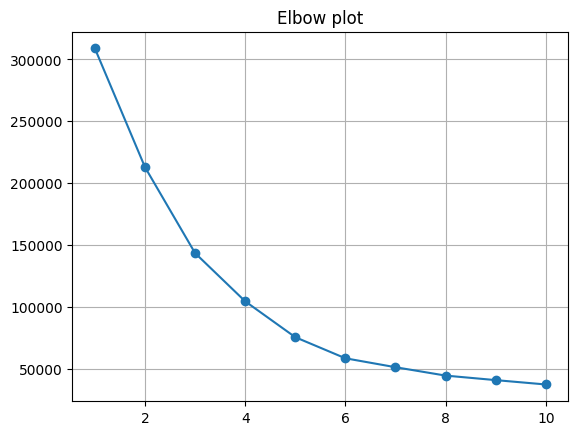

In [ ]:
plt.plot(range(1,11),ssd,marker='o')
plt.grid()
plt.title('Elbow plot')

In [ ]:
#k=6

In [ ]:
Kmodel = KMeans(n_clusters=6)

In [ ]:
#Kmodel.fit_predict(df)
#Kmodel.predict(df)
#Kmodel.fit(df)

In [ ]:
Kmodel.fit(df)

KMeans(n_clusters=6)

In [ ]:
prediction = Kmodel.predict(df)

In [ ]:
prediction


array([5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [ ]:
len(prediction)

200

In [ ]:
Kmodel.cluster_centers_

array([[ 0.36842105, 27.31578947, 57.5       , 48.44736842],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.55882353, 41.64705882, 88.73529412, 16.76470588],
       [ 0.40909091, 44.31818182, 25.77272727, 20.27272727],
       [ 0.43181818, 56.34090909, 53.70454545, 49.38636364]])

In [ ]:
len(Kmodel.cluster_centers_)

6

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
df['Cluster'] = prediction

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,5
1,1,21,15,81,1
2,0,20,16,6,5
3,0,23,16,77,1
4,0,31,17,40,5


In [ ]:
sns.color_palette(None,len(np.unique(prediction)))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

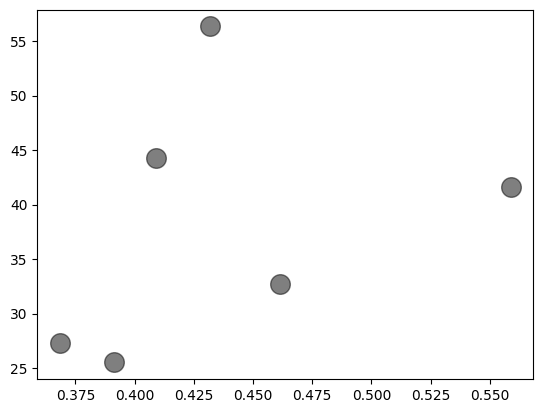

In [ ]:
plt.scatter(Kmodel.cluster_centers_[:,0], Kmodel.cluster_centers_[:,1],
            c='black', s = 200, alpha=0.5)

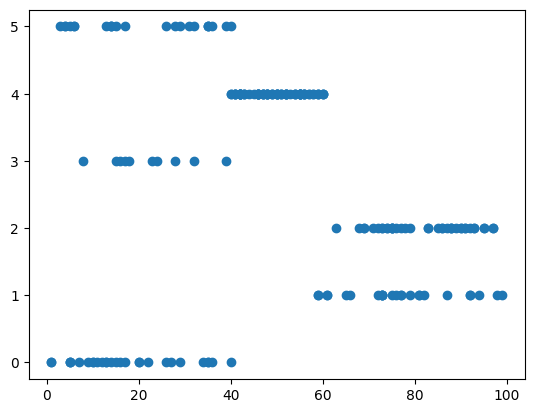

In [ ]:
plt.scatter(df['Spending Score (1-100)'],df['Cluster'],marker='o')

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
var = linkage(df,method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342

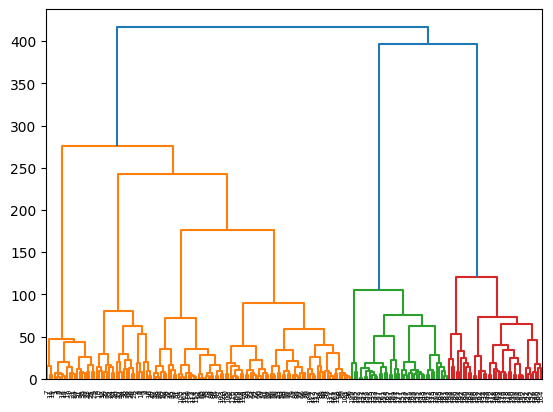

In [ ]:
plt.figure
dendrogram(var,leaf_rotation=90)